# Imports

In [285]:
import pandas as pd
import numpy as np
import featuretools as ft
from sklearnex import patch_sklearn
patch_sklearn()
from category_encoders import TargetEncoder
from woodwork.logical_types import Categorical
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


# Loading the Data

In [286]:
# Считываем train и test датасеты
train_df = pd.read_csv('PD-data-train.csv', sep=';')
test_df = pd.read_csv('PD-data-test.csv', sep=';')

In [287]:
# Добавляем отдельные колонки перед слиянием train и test датасетов
train_df['set'] = 'train'
test_df['set'] = 'test'

# Слияем датасеты
df = train_df.append(test_df)

In [288]:
df.head()

,record_id,ar_revenue,ar_total_expenses,ar_sale_cost,ar_selling_expenses,ar_management_expenses,ar_sale_profit,ar_balance_of_rvns_and_expns,ar_profit_before_tax,ar_taxes,...,head_actual_age,cap_actual_age,ul_staff_range,ul_capital_sum,ul_founders_cnt,ul_branch_cnt,ul_strategic_flg,ul_systematizing_flg,default_12m,set
0,7,52996000.0,48344000.0,48344000.0,0.0,0.0,4652000.0,-2608000.0,2044000.0,846000.0,...,3,3,[1-100],50000.0,2,0,0,0,0.0,train
1,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,12,12,[1-100],10000.0,5,0,0,0,0.0,train
2,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,28,28,[1-100],10000.0,2,0,0,0,0.0,train
3,22,32049000.0,29568000.0,29568000.0,0.0,0.0,2481000.0,-260000.0,2221000.0,302000.0,...,8,8,[1-100],300000.0,1,0,0,0,0.0,train
4,23,16458000.0,14935000.0,14935000.0,0.0,0.0,1523000.0,-274000.0,1249000.0,538000.0,...,27,27,[1-100],10000.0,2,0,0,0,0.0,train


# EDA

### General Info

In [289]:
print('Number of rows in test dataframe: ', test_df.shape[0])
print('Number of columns in test dataframe: ', test_df.shape[1])
print('Number of values in test dataframe: ', test_df.count().sum())
print('Number of NaNs in test dataframe: ', sum(test_df.isna().sum()))

Number of rows in test dataframe:  200
Number of columns in test dataframe:  37
Number of values in test dataframe:  4568
Number of NaNs in test dataframe:  2832


In [290]:
print('Number of rows in train dataframe: ', train_df.shape[0])
print('Number of columns in train dataframe: ', train_df.shape[1])
print('Number of values in train dataframe: ', train_df.count().sum())
print('Number of NaNs in train dataframe: ', sum(train_df.isna().sum()))

Number of rows in train dataframe:  32395
Number of columns in train dataframe:  38
Number of values in train dataframe:  867530
Number of NaNs in train dataframe:  363480


In [291]:
print('Number of rows in dataframe: ', df.shape[0])
print('Number of columns in dataframe: ', df.shape[1])
print('Number of values in dataframe: ', df.count().sum())
print('Number of NaNs in dataframe: ', sum(df.isna().sum()))

Number of rows in dataframe:  32595
Number of columns in dataframe:  38
Number of values in dataframe:  872098
Number of NaNs in dataframe:  366512


### Missing Values

In [292]:
print('Number of NaNs in train_df in all columns:\n')
count = df.isnull().sum().sort_values(ascending=False)
percentage = ((df.isnull().sum()/len(df)*100)).sort_values(ascending=False)
missing = pd.concat([count, percentage], axis=1, keys=['Count','Percentage'])
missing

Number of NaNs in train_df in all columns:



,Count,Percentage
ab_own_capital,15263,46.826200
ab_mobile_current_assets,15263,46.826200
ab_other_borrowings,15263,46.826200
ab_accounts_payable,15263,46.826200
ab_short_term_borrowing,15263,46.826200
ab_long_term_liabilities,15263,46.826200
ab_borrowed_capital,15263,46.826200
ar_revenue,15263,46.826200
ab_losses,15263,46.826200
ab_cash_and_securities,15263,46.826200


### Distribution of Data Points among Output Class

In [293]:
df['default_12m'].value_counts()

0.0    30304
1.0     2091
Name: default_12m, dtype: int64

In [294]:
train_df['default_12m'].values.mean()

0.06454699799351751

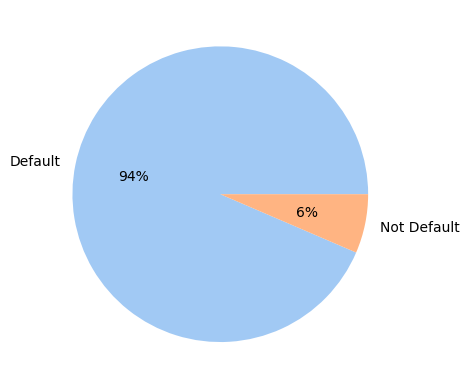

In [295]:
data = df['default_12m'].value_counts()
colors = sns.color_palette('pastel')[0:5]
labels = ['Default', 'Not Default']

plt.pie(data, labels=labels, colors=colors, autopct='%.0f%%')
plt.show()

# Feature Engineering

### Manual Feature Engineering

In [296]:
df['ul_staff_range'].unique()

array(['[1-100]', '(100-500]', '> 500'], dtype=object)

In [297]:
encoder = TargetEncoder()
df['ul_staff_range'] = encoder.fit_transform(df['ul_staff_range'], df['record_id'])

c:\Users\Nick Litwinow\anaconda3\envs\dl\lib\site-packages\category_encoders\target_encoder.py:124: FutureWarning:

Default parameter min_samples_leaf will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327

c:\Users\Nick Litwinow\anaconda3\envs\dl\lib\site-packages\category_encoders\target_encoder.py:129: FutureWarning:

Default parameter smoothing will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327



### Automated Feature Engineering

In [298]:
# Набор entity с id = record_id
es = ft.EntitySet(id='records')
es = es.add_dataframe(
    dataframe_name='records',
    dataframe=df.drop(['set', 'default_12m'], axis=1),
    index='record_id',
    logical_types={
        'record_id': Categorical,
    },
)

In [299]:
features, feature_names = ft.dfs(entityset = es, target_dataframe_name = 'records')

c:\Users\Nick Litwinow\anaconda3\envs\dl\lib\site-packages\featuretools\synthesis\deep_feature_synthesis.py:162: UserWarning:

Only one dataframe in entityset, changing max_depth to 1 since deeper features cannot be created



In [300]:
df[]

,ar_revenue,ar_total_expenses,ar_sale_cost,ar_selling_expenses,ar_management_expenses,ar_sale_profit,ar_balance_of_rvns_and_expns,ar_profit_before_tax,ar_taxes,ar_other_profit_and_losses,...,ogrn_age,adr_actual_age,head_actual_age,cap_actual_age,ul_staff_range,ul_capital_sum,ul_founders_cnt,ul_branch_cnt,ul_strategic_flg,ul_systematizing_flg
record_id,,,,,,,,,,,,,,,,,,,,,
7,52996000.0,48344000.0,48344000.0,0.0,0.0,4652000.0,-2608000.0,2044000.0,846000.0,0.0,...,136,3,3,3,136919.539012,50000.0,2,0,0,0
13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,135,12,12,12,136919.539012,10000.0,5,0,0,0
18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,33,28,28,28,136919.539012,10000.0,2,0,0,0
22,32049000.0,29568000.0,29568000.0,0.0,0.0,2481000.0,-260000.0,2221000.0,302000.0,0.0,...,139,8,8,8,136919.539012,300000.0,1,0,0,0
23,16458000.0,14935000.0,14935000.0,0.0,0.0,1523000.0,-274000.0,1249000.0,538000.0,0.0,...,138,27,27,27,136919.539012,10000.0,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265577,21287000.0,18838000.0,16227000.0,2611000.0,0.0,2449000.0,-123000.0,2326000.0,483000.0,0.0,...,47,32,32,32,136919.539012,10000.0,1,0,0,0
266648,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,140,6,6,6,136919.539012,0.0,1,0,0,0
266849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,22,7,7,7,136919.539012,20000.0,1,0,0,0


# Feature Selection

# Model Selection and Evaluation

In [301]:
# Get a list of models to evaluate
def get_models():
    models = dict()
    models['LogisticRegression'] = LogisticRegression()
    models['SVC'] = SVC()
    models['GaussianNB'] = GaussianNB()
    models['MultinomialNB'] = MultinomialNB()
    models['SGDClassifier'] = SGDClassifier()
    models['DecisionTreeClassifier'] = DecisionTreeClassifier()
    models['RandomForestClassifier'] = RandomForestClassifier()
    models['GradientBoostingClassifier'] = GradientBoostingClassifier()
    # models['LGBMClassifier'] = LGBMClassifier()
    models['CatBoostClassifier'] = CatBoostClassifier()
    models['XGBClassifier'] = XGBClassifier()
    models['Stacking'] = get_stacking()
    return models

In [302]:
# Evaluate a given model using cross-validation
def roc_auc_evaluate_model(model, x, y):
    start_time = time.time()
    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, x, y, scoring='roc_auc', cv=cv, n_jobs=-1, error_score='raise')
    run_time = time.time() - start_time
    return scores, run_time

In [303]:
# Get a stacking ensemble of models
def get_stacking():
    # Defining the base models
    level0 = list()
    level0.append(('LogisticRegression', LogisticRegression()))
    level0.append(('GradientBoosting', GradientBoostingClassifier()))
    level0.append(('CatBoost', CatBoostClassifier()))
    level0.append(('XGBClassifier', XGBClassifier()))
    level0.append(('GaussianNB', GaussianNB()))
    level0.append(('SGDClassifier', SGDClassifier()))
    # Defining meta learner model
    level1 = LogisticRegression()
    # Defining the stacking ensemble
    model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
    return model

In [304]:
# Get the models to evaluate
models = get_models()
roc_auc_results, names, runs = list(), list(), list()

# Evaluate the models and store results
for name, model in models.items():
    roc_auc_scores, run_time = roc_auc_evaluate_model(model, train_df.drop('default_12m', axis=1), train_df['default_12m'])
    roc_auc_results.append(roc_auc_scores)
    names.append(name)
    runs.append(run_time)
    print(name, "| ROC AUC:", mean(roc_auc_scores), "| Standard Deviation:", std(roc_auc_scores),"| Time Taken:", run_time)

NameError: name 'LogisticRegression' is not defined

In [ ]:
roc_auc_mean_results, roc_auc_std_results = list(), list()
r2_mean_results, r2_std_results = list(), list()
for value in range(len(roc_auc_results)):
    roc_auc_mean_results.append(mean(roc_auc_results[value]))
    roc_auc_std_results.append(std(roc_auc_results[value]))

In [ ]:
data = {'Name':names, 'ROC AUC':roc_auc_mean_results, 'Standart Deviation':roc_auc_std_results, 'Time Taken':runs}
df_models = pd.DataFrame(data)
df_models.set_index('Name', inplace=True)
df_models

# Hyperparameter Tuning

# Results

In [ ]:
answ_df = pd.DataFrame()
answ_df['id'] = test_record_id
predict = pd.DataFrame([math.floor(float(x)) for x in (predictions*100)])
answ_df['predict'] = predict
answ_df.to_csv('PD-submit.csv',index=False, sep=';')